In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
from matplotlib import rc


%matplotlib inline

In [2]:
sf_2009 = pd.read_csv('data/2009SINGLEFAMILYSF.txt')
sf_2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
sf_2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [3]:
sf1 = pd.merge(sf_2009, sf_2013, on= 'AddressFullAddress', how = 'outer',suffixes = ('_f','_s'))
sf1.columns

sf1.rename(columns = {'FinishedArea_f' : '2009_FinishedArea', 'FinishedArea_s' : '2013_FinishedArea'}, inplace = True)

sf1['APN']= sf1['APN_f'].where(sf1['APN_s'].isnull(), sf1['APN_s'])
sf1['DistrictCode']= sf1['DistrictCode_f'].where(sf1['DistrictCode_s'].isnull(), sf1['DistrictCode_s'])
sf1['Council District']= sf1['Council District_f'].where(sf1['Council District_s'].isnull(), sf1['Council District_s'])
sf1['AddressCity']= sf1['AddressCity_f'].where(sf1['AddressCity_s'].isnull(), sf1['AddressCity_s'])
sf1['AddressPostalCode']= sf1['AddressPostalCode_f'].where(sf1['AddressPostalCode_s'].isnull(), sf1['AddressPostalCode_s'])
#sf1['FinishedArea']= sf1['FinishedArea_f'].where(sf1['FinishedArea_s'].isnull(), sf1['FinishedArea_s'])
sf1.columns

sf1.drop(['APN_f','DistrictCode_f','Council District_f','AddressCity_f',
          'AddressPostalCode_f','DistrictCode_s','Council District_s','AddressCity_s','APN_s','AddressPostalCode_s'], axis = 1,inplace = True)

final_sf = pd.merge(sf1, sf_2017,on= 'AddressFullAddress', how = 'outer', suffixes = ('_m','_n'),indicator = True)
final_sf.columns

final_sf.rename(columns = {'FinishedArea': '2017_FinishedArea'}, inplace = True)

final_sf['APN']= final_sf['APN_m'].where(final_sf['APN_n'].isnull(), final_sf['APN_n'])
final_sf['DistrictCode']= final_sf['DistrictCode_m'].where(final_sf['DistrictCode_n'].isnull(), final_sf['DistrictCode_n'])
final_sf['Council District']= final_sf['Council District_m'].where(final_sf['Council District_n'].isnull(), final_sf['Council District_n'])
final_sf['AddressCity']= final_sf['AddressCity_m'].where(final_sf['AddressCity_n'].isnull(), final_sf['AddressCity_n'])
final_sf['AddressPostalCode']= final_sf['AddressPostalCode_m'].where(final_sf['AddressPostalCode_n'].isnull(), final_sf['AddressPostalCode_n'])
#final_sf['FinishedArea']= final_sf['FinishedArea_m'].where(final_sf['FinishedArea_n'].isnull(), final_sf['FinishedArea_n'])


final_sf.drop(['APN_m','DistrictCode_m','Council District_m','AddressCity_m',
          'AddressPostalCode_m','DistrictCode_n','Council District_n','AddressCity_n','APN_n','AddressPostalCode_n'], axis = 1, inplace = True)
final_sf.columns

final_sf.drop_duplicates(keep ='first', inplace = True)

In [4]:
# Mortgage payment calculation
r = 0.04 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
final_sf['Mortgage_Per_Year_2009'] = 12* (1-d)*final_sf['2009 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2013'] = 12* (1-d)*final_sf['2013 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2017'] = 12* (1-d)*final_sf['2017 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

How many affordable homes for a family of 4 each year?

MHI: 2009 - 64900

2013 - 62300

2017 - 68000

MHI overall:

2009 - 45668

2013 - 47335

2017 - 50484

In [5]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]

197589

In [6]:
final_sf.loc[(final_sf.Mortgage_Per_Year_2009 >0) & (final_sf.Mortgage_Per_Year_2009.isna())]

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2009_FinishedArea,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,...,2017_FinishedArea,_merge,APN,DistrictCode,Council District,AddressCity,AddressPostalCode,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017


In [7]:
x = [2009, 2013, 2017]
y = [135978, 134383, 109993]

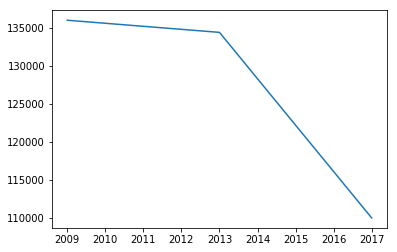

In [8]:
plt.plot(x,y)

Home Price Index Data -  a broad measure of the movement of single-family house prices. The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties.
https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx

In [9]:
# Home price index data from the Federal Housing Finance Agency
HPI = pd.read_csv('data/Davidson_HPI.csv').rename(columns = {'Annual Change (%)' : 'Annual_Change'})

In [10]:
HPI.Annual_Change = pd.to_numeric(HPI.Annual_Change, errors = 'coerce')

In [11]:
HPI.head()

,State,County,FIPS code,Year,Annual_Change,HPI,HPI with 1990 base,HPI with 2000 base
0,TN,Davidson,47037,1975,NaN,100.00,39.09,25.65
1,TN,Davidson,47037,1976,9.43,109.43,42.78,28.07
2,TN,Davidson,47037,1977,3.29,113.03,44.19,28.99
3,TN,Davidson,47037,1978,19.07,134.58,52.61,34.52
4,TN,Davidson,47037,1979,13.86,153.23,59.90,39.31


In [12]:
USA_HPI = pd.read_csv('data/USA_HPI.csv').rename(columns = {'Annual Change (%)' : 'Annual_Change'})
USA_HPI.Annual_Change = pd.to_numeric(USA_HPI.Annual_Change, errors = 'coerce')

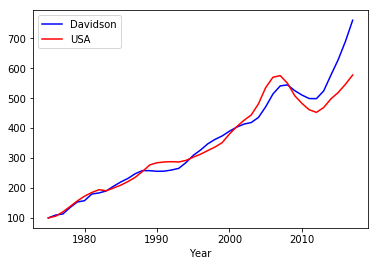

In [13]:
ax = HPI.plot(x = 'Year', y = 'HPI', color = 'blue', label = 'Davidson')
_ = USA_HPI.plot(x = 'Year', y = 'HPI', color = 'red', ax = ax, label = 'USA')

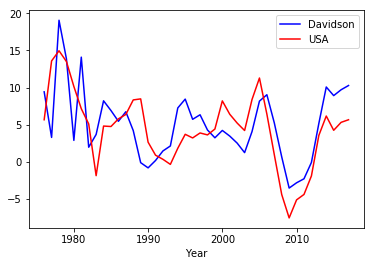

In [14]:
ax = HPI.plot(x = 'Year', y = 'Annual_Change', color = 'blue', label = 'Davidson')
_ = USA_HPI.plot(x = 'Year', y = 'Annual_Change', color = 'red', ax = ax, label = 'USA')

In [15]:
HPI.tail(10)

,State,County,FIPS code,Year,Annual_Change,HPI,HPI with 1990 base,HPI with 2000 base
33,TN,Davidson,47037,2008,0.67,544.63,212.91,139.71
34,TN,Davidson,47037,2009,-3.53,525.39,205.39,134.77
35,TN,Davidson,47037,2010,-2.82,510.57,199.59,130.97
36,TN,Davidson,47037,2011,-2.28,498.91,195.04,127.98
37,TN,Davidson,47037,2012,-0.08,498.51,194.88,127.88
38,TN,Davidson,47037,2013,5.17,524.29,204.96,134.49
39,TN,Davidson,47037,2014,10.08,577.13,225.61,148.04
40,TN,Davidson,47037,2015,8.92,628.61,245.74,161.25
41,TN,Davidson,47037,2016,9.71,689.65,269.60,176.91
42,TN,Davidson,47037,2017,10.28,760.55,297.32,195.10


In [16]:
#Average annual growth in home prices in Davidson County since 1975:
HPI.Annual_Change.mean()

5.051428571428572

In [17]:
#Average annual growth in home prices in Davidson County since 2014:
HPI.loc[HPI.Year >= 2014].Annual_Change.mean()

9.7475

In [18]:
#Average annual growth since 2013 (when prices started going up)
HPI.loc[HPI.Year >= 2013].Annual_Change.mean()

8.832

In [23]:
meds = pd.read_csv('data/Medinc.csv')

In [25]:
meds.MHITN47037A052NCEN = pd.to_numeric(meds.MHITN47037A052NCEN, errors = 'coerce')
meds['Growth'] = 100*(meds.MHITN47037A052NCEN - meds.MHITN47037A052NCEN.shift(1)) / meds.MHITN47037A052NCEN.shift(1)

In [26]:
meds["Year"] = meds.DATE.apply(lambda x: pd.to_numeric(x[:4]))

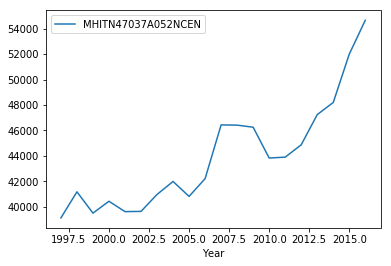

In [31]:
meds.loc[meds.Year >= 1997].plot(x = 'Year', y = 'MHITN47037A052NCEN')

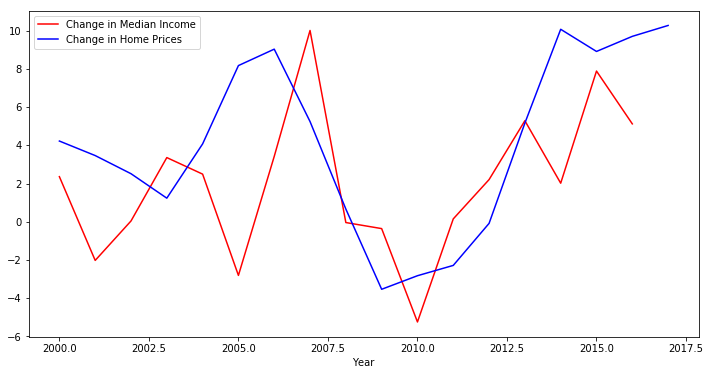

In [32]:
ax = meds.loc[meds.Year >= 2000].plot(x = 'Year', y = 'Growth', label = 'Change in Median Income', color = 'red', figsize=(12, 6))
_ = HPI.loc[HPI.Year >= 2000].plot(x = 'Year', y = 'Annual_Change', color = 'blue', label = 'Change in Home Prices', ax = ax)

In [125]:
meds.tail(8)

,DATE,MHITN47037A052NCEN,Growth,Year
20,2009-01-01,46249.0,-0.353349,2009
21,2010-01-01,43825.0,-5.241194,2010
22,2011-01-01,43893.0,0.155163,2011
23,2012-01-01,44864.0,2.212198,2012
24,2013-01-01,47239.0,5.293777,2013
25,2014-01-01,48195.0,2.023752,2014
26,2015-01-01,51999.0,7.892935,2015
27,2016-01-01,54666.0,5.128945,2016


In [121]:
meds.Growth.mean()

1.8499021736866526

In [229]:
# Avg income growth since 2012
meds.loc[meds.Year >= 2013].Growth.mean()

5.084852011967955

In [34]:
HPI.tail()

,State,County,FIPS code,Year,Annual_Change,HPI,HPI with 1990 base,HPI with 2000 base
38,TN,Davidson,47037,2013,5.17,524.29,204.96,134.49
39,TN,Davidson,47037,2014,10.08,577.13,225.61,148.04
40,TN,Davidson,47037,2015,8.92,628.61,245.74,161.25
41,TN,Davidson,47037,2016,9.71,689.65,269.60,176.91
42,TN,Davidson,47037,2017,10.28,760.55,297.32,195.10


In [35]:
pop = pd.read_csv('data/Pop.csv')

In [36]:
pop.head(1)

,DATE,TNDAVI5POP
0,1970-01-01,447.877


In [37]:
pop.tail(5)

,DATE,TNDAVI5POP
43,2013-01-01,659.868
44,2014-01-01,670.314
45,2015-01-01,681.285
46,2016-01-01,688.901
47,2017-01-01,691.243


In [38]:
pop['Annual_Change'] = 100*(pop.TNDAVI5POP - pop.TNDAVI5POP.shift(1)) / pop.TNDAVI5POP.shift(1)
pop['Year'] = pop.DATE.apply(lambda x: pd.to_numeric(x[:4]))

In [39]:
#Annual Change in population since 1970:
100*((691.243/447.877)**(1/(2017 - 1970)) -1)

0.9276223442135967

In [40]:
#Avg Change in population since 2013:
pop.loc[pop.Year >= 2013].Annual_Change.mean()

1.2602236870830557

In [273]:
# Number of Davidson County households (from the census bureau)

total_hh = pd.DataFrame({'Year' : [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
                        'Households': [255290, 249899, 254655, 258465, 261571, 267952, 274187, 281967, 283929]})


In [274]:
total_hh['Annual_Change'] = 100* ((total_hh.Households - total_hh.Households.shift(1)) / total_hh.Households.shift(1))

In [276]:
#Avg growth in # households since 2009:
total_hh.Annual_Change.mean()

1.3486262848687574

In [275]:
#Avg growth in # households since 2013
total_hh.loc[total_hh.Year >= 2013].Annual_Change.mean()

1.9002831294701044

In [185]:
proj_hh_high = 283929* (1.019002831294701044)**8
proj_hh_high

330075.1873043085

In [187]:
proj_hh_avg = 283929 * (1.013486262848687574)**8
proj_hh_avg

316047.73682842136

In [189]:
# 1% growth (average growth since 1970)
proj_hh_low =  283929 * (1.01)**8
proj_hh_low

307454.42157227517

In [41]:
final_sf_trimmed = final_sf.loc[(final_sf['2017 IMPR'] >= final_sf['2017 LAND']) | (final_sf['Mortgage_Per_Year_2017'].isna())]

In [82]:
# Percentage of affordable homes (family of 4) in 2009:
final_sf.loc[(final_sf.Mortgage_Per_Year_2009 < 64900 * 0.6 * 0.3)].shape[0] / final_sf.loc[(final_sf.Mortgage_Per_Year_2009 >0)].shape[0]

0.7394931477050251

In [83]:
# Percentage of affordable homes (family of 4) in 2013:
final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300 * 0.6 * 0.3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2013 > 0].shape[0]

0.719599243896823

In [84]:
# Percentage of affordable homes (family of 4) in 2017:
final_sf_trimmed.loc[final_sf_trimmed.Mortgage_Per_Year_2017 < 68000 * 0.6 * 0.3].shape[0] / final_sf_trimmed.loc[final_sf_trimmed.Mortgage_Per_Year_2017 > 0].shape[0]

0.5654306955382099

There is a major drop in the percentage of affordable single family homes from 2013 to 2017.

In [85]:
#Total number of single family homes in 2009:
final_sf.loc[(final_sf.Mortgage_Per_Year_2009 >0)].shape[0]

183880

In [86]:
#Total number of single family homes in 2013:
final_sf.loc[final_sf.Mortgage_Per_Year_2013 > 0].shape[0]

186747

In [88]:
#Number of single family homes in 2017:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]

197589

In [190]:
#Annual growth in # of sf homes, 2009 - 2017:
100* ((final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2009 > 0].shape[0])**(1/8) - 1)

0.9028733429464308

In [91]:
#Annual growth in # of sf homes, 2013 - 2017:
100* ((final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2013 > 0].shape[0])**(1/4) - 1)

1.4208584885899933

Compare with permits data:

In [104]:
bp = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
new_res = bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'] == 'CAA01R301')]
new_res.shape[0]

10039

In [107]:
demo_res = bp.loc[(bp['Permit Subtype'] == 'CAZ01A001')]
demo_res.shape[0]

2783

In [109]:
bp['Date Issued'] = pd.to_datetime(bp['Date Issued'])

In [114]:
bp.nsmallest(1, 'Date Issued')

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
98,201528809,Building Commercial - Rehab,"Medical Office, Professional Services",103140B20000CO,07/09/2015,2015-09-03,489000.0,85 WHITE BRIDGE PIKE 200,NASHVILLE,TN,37205,UNIT 200 85 WHITE BRIDGE ROAD CONDOMINIUM 1ST ...,Dyer Construction Llc,CACR,CAE04B016,2055816,renovation on existing building FOR TSC VASCUL...,24.0,37018102.0,"85 WHITE BRIDGE PIKE 200\nNASHVILLE, TN 37205\n"


In [113]:
bp.nlargest(1, 'Date Issued')

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
36007,2018056729,Building Residential - New,Single Family Residence,128120B00600CO,09/05/2018,2018-09-06,360480.0,601 SUMMIT OAKS CT,NASHVILLE,TN,37221,LOT 6 WOODBURY PHASE 2,BONHAM BUILDERS LLC,CARN,CAA01R301,3556387,PERMIT TO CONSTRUCT SINGLE FAMILY RESIDENCE� �...,22.0,37018401.0,"601 SUMMIT OAKS CT\nNASHVILLE, TN 37221\n(36.0..."


Permits data covers roughly a 3 year period from September 2015 until September 2018.

In [115]:
new_res.shape[0] - demo_res.shape[0]

7256

DC added roughly 7256 single family homes in that 3 year period. This is about 2418 per year, or 1.29% growth in housing stock.

In [118]:
100 * 2418 / 186747

1.2947999164645214

The growth in the number of sf homes is lower than the growth in the number of households by close to 0.5% - this will exacerbate the housing problems. (Lead to more demand than supply)

## Projecting Mortgage Costs in 2025:

In [119]:
# Using the growth rate in prices since 2014 (9.7475%)
final_sf['Mortgage_Per_Year_2025_High'] = final_sf['Mortgage_Per_Year_2017']*(1.097475)**8

In [120]:
# Using the average growth rate in prices since 1975 (5.051428571428572%)
final_sf['Mortgage_Per_Year_2025_Avg'] = final_sf['Mortgage_Per_Year_2017']*(1.05051428571428572)**8

Growth in median income

In [128]:
meds.loc[meds.Year >= 2012].Growth.mean()

4.510321178526133

In [127]:
# Using average annual growth since 2012 (4.510321178526133%)
med_high = 68000*(1 + 0.04510321178526133)**8
med_high

96779.2766880292

In [137]:
# Using avg. annual growth 3% (above average, but less than hte last few years)
med_medium = 68000*(1 + 0.03)**8
med_medium

86140.36553435792

In [133]:
meds.loc[meds.Year >= 2000].Growth.mean()

1.9982533112347018

In [138]:
# Using avg. annual growth since 2000 (2%)
med_low = 68000*(1 + 0.02)**8
med_low

79672.83790815408

## Scenario 1: High Income Growth

In [139]:
final_sf.loc[final_sf.Mortgage_Per_Year_2025_High < med_high * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025_High > 0].shape[0]

0.2612847881207962

In [140]:
final_sf.loc[final_sf.Mortgage_Per_Year_2025_Avg < med_high * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025_Avg > 0].shape[0]

0.5270789365804777

## Analysis by Council District

In [141]:
final_sf['Change_Per_Year'] = (final_sf.Mortgage_Per_Year_2017/final_sf.Mortgage_Per_Year_2013)**(1/4) -1

In [143]:
rates = dict(final_sf.groupby('Council District').Change_Per_Year.mean())

In [144]:
final_sf['Proj_High_Dist'] = final_sf.apply(lambda row: row['Mortgage_Per_Year_2017'] * (1 + rates[row['Council District']])**8, axis = 1)

In [145]:
final_sf.head()

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2009_FinishedArea,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,...,AddressCity,AddressPostalCode,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017,Mortgage_Per_Year_2025_High,Mortgage_Per_Year_2025_Avg,Pct_Change,Proj_High_Dist,Change_Per_Year
0,1012 OLD BUCK HILL RD,49800.0,65700.0,115500.0,28875.0,1920.0,43500.0,70500.0,114000.0,28500.0,...,GOODLETTSVILLE,37072.0,6286.127195,6204.489180,7369.191535,15508.754900,10930.387176,0.187719,11661.873060,0.043947
1,1109 HIGHLAND AVE,44100.0,88700.0,132800.0,33200.0,1464.0,40100.0,96500.0,136600.0,34150.0,...,GOODLETTSVILLE,37072.0,7227.685641,7434.501947,8152.916484,17158.135037,12092.850805,0.096633,12902.131348,0.023329
2,0 SPRINGFIELD HWY,15000.0,137900.0,152900.0,38225.0,3539.0,15000.0,158400.0,173400.0,43350.0,...,GOODLETTSVILLE,37072.0,8321.635049,9437.354595,11053.787302,23263.132350,16395.580764,0.171280,17492.809591,0.040316
3,133 B EAST END RD,41100.0,27000.0,68100.0,17025.0,736.0,32300.0,26900.0,59200.0,14800.0,...,GOODLETTSVILLE,37072.0,3706.365905,3221.980346,3488.664530,7342.032416,5174.577681,0.082770,5520.871958,0.020080
4,141 B EAST END RD,25100.0,60900.0,86000.0,21500.0,1301.0,19700.0,63300.0,83000.0,20750.0,...,GOODLETTSVILLE,37072.0,4680.579557,4517.303526,5322.798612,11202.040098,7895.065479,0.178313,8423.420866,0.041874


In [147]:
final_sf.loc[(final_sf['Council District'] == 5) & (final_sf.Mortgage_Per_Year_2017 < 68000 * 0.6 * 0.3)].shape[0] / final_sf.loc[(final_sf['Council District'] == 5) &(final_sf.Mortgage_Per_Year_2017 > 0)].shape[0]

0.6069340858697844

In [148]:
districts = final_sf.groupby('Council District').Change_Per_Year.mean().to_frame().reset_index()

In [167]:
districts['Pct_Affordable_2017'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Mortgage_Per_Year_2017 < 68000 * 0.6 * 0.3)].shape[0] / final_sf.loc[(final_sf['Council District'] == x) &(final_sf.Mortgage_Per_Year_2017 > 0)].shape[0])
districts['Pct_Affordable_2025'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Proj_High_Dist < med_high * 0.6 * 0.3)].shape[0] / final_sf.loc[(final_sf['Council District'] == x) &(final_sf.Mortgage_Per_Year_2017 > 0)].shape[0])
districts['Pct_Affordable_2025_Avg'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Mortgage_Per_Year_2025_Avg < med_high * 0.6 * 0.3)].shape[0] / final_sf.loc[(final_sf['Council District'] == x) &(final_sf.Mortgage_Per_Year_2017 > 0)].shape[0])


In [168]:
districts.head()

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
0,1.0,0.074172,0.736729,0.565776,0.703924,5920,5968,6066,0.004080,6266.854173
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438
2,3.0,0.071794,0.790866,0.641862,0.766002,5345,5440,5671,0.010451,6162.843544
3,4.0,0.065313,0.163507,0.101896,0.143016,6856,6964,7174,0.007455,7613.188662
4,5.0,0.214676,0.606934,0.017134,0.564201,4513,4532,4961,0.022869,5944.671747


In [169]:
districts.nlargest(5, 'Pct_Affordable_2017')

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
29,30.0,0.097622,0.964088,0.526538,0.950356,3744,3779,3787,0.000529,3803.050843
27,28.0,0.085975,0.958425,0.618753,0.937196,4305,4346,4522,0.009974,4895.671062
28,29.0,0.075531,0.950708,0.728978,0.930411,5691,5778,5863,0.003658,6036.769693
8,9.0,0.079576,0.930665,0.763089,0.912270,4858,4873,4947,0.003775,5098.388294
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438


In [170]:
districts.nlargest(5, 'Pct_Affordable_2025')

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
8,9.0,0.079576,0.930665,0.763089,0.912270,4858,4873,4947,0.003775,5098.388294
28,29.0,0.075531,0.950708,0.728978,0.930411,5691,5778,5863,0.003658,6036.769693
9,10.0,0.059055,0.790623,0.695140,0.757225,4482,4506,4671,0.009031,5019.347075
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438
2,3.0,0.071794,0.790866,0.641862,0.766002,5345,5440,5671,0.010451,6162.843544


In [171]:
districts.nlargest(5, 'Pct_Affordable_2025_Avg')

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
29,30.0,0.097622,0.964088,0.526538,0.950356,3744,3779,3787,0.000529,3803.050843
27,28.0,0.085975,0.958425,0.618753,0.937196,4305,4346,4522,0.009974,4895.671062
28,29.0,0.075531,0.950708,0.728978,0.930411,5691,5778,5863,0.003658,6036.769693
8,9.0,0.079576,0.930665,0.763089,0.912270,4858,4873,4947,0.003775,5098.388294
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438


In [172]:
districts.loc[districts['Council District'] == 20]

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
19,20.0,0.146721,0.601393,0.083383,0.547463,4420,4392,5025,0.034233,6577.843483


In [173]:
districts['Count_2009'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Mortgage_Per_Year_2009 > 0)].shape[0])
districts['Count_2013'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Mortgage_Per_Year_2013 > 0)].shape[0])
districts['Count_2017'] = districts['Council District'].apply(lambda x: final_sf.loc[(final_sf['Council District'] == x) & (final_sf.Mortgage_Per_Year_2017 > 0)].shape[0])

In [174]:
districts.head()

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
0,1.0,0.074172,0.736729,0.565776,0.703924,5920,5968,6066,0.004080,6266.854173
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438
2,3.0,0.071794,0.790866,0.641862,0.766002,5345,5440,5671,0.010451,6162.843544
3,4.0,0.065313,0.163507,0.101896,0.143016,6856,6964,7174,0.007455,7613.188662
4,5.0,0.214676,0.606934,0.017134,0.564201,4513,4532,4961,0.022869,5944.671747


In [175]:
districts['Growth_Rate'] = (districts['Count_2017'] / districts['Count_2013'])**(1/4) - 1

In [176]:
districts.head()

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
0,1.0,0.074172,0.736729,0.565776,0.703924,5920,5968,6066,0.004080,6266.854173
1,2.0,0.104110,0.915794,0.662304,0.898560,4365,4382,4584,0.011330,5016.364438
2,3.0,0.071794,0.790866,0.641862,0.766002,5345,5440,5671,0.010451,6162.843544
3,4.0,0.065313,0.163507,0.101896,0.143016,6856,6964,7174,0.007455,7613.188662
4,5.0,0.214676,0.606934,0.017134,0.564201,4513,4532,4961,0.022869,5944.671747


In [177]:
districts['Projected_Count_2025'] = districts['Count_2017'] * (1 + districts['Growth_Rate'])**8

In [178]:
districts.nlargest(5, 'Growth_Rate')

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
16,17.0,0.137317,0.349868,0.067220,0.322737,3826,3961,4939,0.056717,7679.048202
31,32.0,0.077724,0.863469,0.576964,0.820506,2971,3201,3794,0.043405,5329.919274
30,31.0,0.072716,0.511429,0.287453,0.474534,6383,6916,8050,0.038688,10906.305832
32,33.0,0.076955,0.845262,0.527270,0.804911,6898,7017,8104,0.036662,10809.244587
18,19.0,0.128525,0.219139,0.076050,0.198054,5004,4822,5549,0.035731,7348.348797


In [179]:
districts.loc[districts['Council District'] == 5]

,Council District,Change_Per_Year,Pct_Affordable_2017,Pct_Affordable_2025,Pct_Affordable_2025_Avg,Count_2009,Count_2013,Count_2017,Growth_Rate,Projected_Count_2025
4,5.0,0.214676,0.606934,0.017134,0.564201,4513,4532,4961,0.022869,5944.671747


In [180]:
districts.Count_2017.sum()

197589

In [181]:
(districts.Pct_Affordable_2017 * districts.Count_2017).sum()

109993.0

In [182]:
(districts.Pct_Affordable_2025 * districts.Projected_Count_2025).sum()

69724.10032830294

In [183]:
(districts.Pct_Affordable_2025_Avg * districts.Projected_Count_2025).sum()

116871.99568960743

In [191]:
import ipywidgets as widgets

In [205]:
HPI_widget = widgets.Dropdown(
    options=['low: 1%', '2', '3'],
    value='2',
    description='Home Prices Increase:',
    disabled=False,
)
display(HPI_widget)

Dropdown(description='Home Prices Increase:', index=1, options=('low: 1%', '2', '3'), value='2')

In [198]:
w.value

'3'

In [ ]:
from matplotlib import rc

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# y-axis in bold
rc('font', weight='bold')

# The position of the bars on the x-axis
r = [0,2]

# Names of group and bar width
names = ['2017','2025']
barWidth = 1

labels = list(reversed(['0% - 30%', '30% - 60%', '60% - 80%', '80% - 120%']))

for i in range(len(nash_cdf_2016) -1):
    plt.bar(r, [nash_cdf_2010[len(nash_cdf_2016) -1 - i], nash_cdf_2013[len(nash_cdf_2016) -1 - i], nash_cdf_2015[len(nash_cdf_2016) -1 - i], nash_cdf_2016[len(nash_cdf_2016) -1 - i]], edgecolor='white', width=barWidth, label = labels[i])

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year")
plt.title("Distribution of Affordable and Workforce Homes")

plt.legend()

# Show graphic
plt.show()

In [433]:
med_2017 = 68000
homes_2017 = 197589
hh_2017 = 283929
pct_aff_low_2017 = 100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .3 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]
pct_aff_high_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - pct_aff_low_2017
pct_wf_low_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .8 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - (pct_aff_low_2017 + pct_aff_high_2017)
pct_wf_high_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * 1.2 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - (pct_aff_low_2017 + pct_aff_high_2017 + pct_wf_low_2017)
num_aff_low_2017 = homes_2017 * pct_aff_low_2017 / 100
num_aff_high_2017 = homes_2017 * pct_aff_high_2017 / 100
num_wf_low_2017 = homes_2017 * pct_wf_low_2017 / 100
num_wf_high_2017 = homes_2017 * pct_wf_high_2017 /100


def home_proj(hp_growth, income_growth, pop_growth, home_growth):
    med_2025 = med_2017* (1+income_growth)**8
    final_sf['Mortgage_Per_Year_2025'] = final_sf['Mortgage_Per_Year_2017']*(1 + hp_growth)**8
    
    pct_aff_low = 100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * .3 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]
    pct_aff_high = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]) - pct_aff_low
    pct_wf_low = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * .8 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]) - (pct_aff_low + pct_aff_high)
    pct_wf_high = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * 1.2 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]) - (pct_aff_low + pct_aff_high + pct_wf_low)
        
    pct_aff = 100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]
    pct_workforce = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2025 < med_2025 * 1.2 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2025 > 0].shape[0]) - pct_aff
    
    homes_2025 = homes_2017*(1 + home_growth)**8

    num_aff = homes_2025 * pct_aff / 100
    num_workforce = homes_2025 * pct_workforce / 100
    
    num_aff_low = homes_2025 * pct_aff_low / 100
    num_aff_high = homes_2025 * pct_aff_high / 100
    num_wf_low = homes_2025 * pct_wf_low / 100
    num_wf_high = homes_2025 * pct_wf_high /100
    
    hh_2025 = hh_2017*(1+pop_growth)**8
    
    groups = ['Affordable 0% - 30%', 'Affordable 30% - 60%', 'Workforce 60% - 80%', 'Workforce 80% - 120%']
    pct_2017 = [pct_aff_low_2017, pct_aff_high_2017, pct_wf_low_2017, pct_wf_high_2017]
    num_2017 = [num_aff_low_2017, num_aff_high_2017, num_wf_low_2017, num_wf_high_2017]
    pct_2025 = [pct_aff_low, pct_aff_high, pct_wf_low, pct_wf_high]
    num_2025 = [num_aff_low, num_aff_high, num_wf_low, num_wf_high]
    
    cum_pct_2017 = np.array(pct_2017).cumsum()
    cum_pct_2025 = np.array(pct_2025).cumsum()
    
    df = pd.DataFrame({'Group' : groups, 'Percent 2017': pct_2017, 'Number 2017' : num_2017,
                     'Percent 2025': pct_2025, 'Number 2025': num_2025})
    
    df['Number 2017'] = df['Number 2017'].apply(lambda x: '{0:,.0f}'.format(x))
    df['Number 2025'] = df['Number 2025'].apply(lambda x: '{0:,.0f}'.format(x))
    df['Percent 2017'] = df['Percent 2017'].apply(lambda x: '{0:.2f}%'.format(x))
    df['Percent 2025'] = df['Percent 2025'].apply(lambda x: '{0:.2f}%'.format(x))

    
    printmd('***Number of Households in 2025: ***' + '{0:,.0f}'.format(hh_2025))
    printmd('***Median Income in 2025 (Family of 4): ***' + '${:,.2f}'.format(med_2025))


    display(HTML(df.to_html(index = False)))
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # y-axis in bold
    rc('font', weight='bold')

    # The position of the bars on the x-axis
    r = [0,2]

    # Names of group and bar width
    names = ['2017','2025']
    barWidth = 1

    labels = list(reversed(['0% - 30%', '30% - 60%', '60% - 80%', '80% - 120%']))
    
    plt.grid(axis = 'y', linestyle = '--', color = 'black')

    for i in range(len(cum_pct_2017)):
        plt.bar(r, [cum_pct_2017[len(cum_pct_2017) -1 - i], cum_pct_2025[len(cum_pct_2017) -1 - i]], edgecolor='white', width=barWidth, label = labels[i])

    # Custom X axis
    plt.xticks(r, names, fontweight='bold', fontsize = 16)
    plt.xlabel("Year", fontsize = 16)
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 14)
    plt.title("Percentage of Affordable and Workforce Homes", fontsize = 16)

    plt.legend(title = "Income Bracket", loc = 'upper right')
    

    # Show graphic
    plt.show()    


In [432]:
style = {'description_width': 'initial'}
# Continuous_update = False for IntSlider control to stop continuous model evaluation while the slider is being dragged
m = interactive(home_proj,
                hp_growth=widgets.Dropdown(options={"Recent: 9.75%":0.0975,
                                                    "Medium: 7.5%":0.075,
                                                    "Average: 5.05%":0.0505},
                                          description="Growth in Home Prices",style=style),
                income_growth =widgets.Dropdown(options={"Recent: 4.5%":0.045,
                                                    "Medium: 3%":0.03,
                                                    "Average: 1.85%":0.0185},
                                          description="Income Growth",style=style),
                pop_growth = widgets.Dropdown(options={"High: 2%":0.02,
                                                    "Medium: 1.5%":0.015,
                                                    "Low: 1%":0.01},
                                              value = 0.015,
                                          description="Population Growth",style=style),
                home_growth = widgets.Dropdown(options={"High: 1.8%":0.018,
                                                    "Recent: 1.4%":0.014,
                                                    "Low: 1%":0.01},
                                               value = 0.014,
                                          description="Growth in Home Supply",style=style)
)

# Set the height of the control.children[-1] so that the output does not jump and flicker
#output = m.children[-1]
#output.layout.height = '450px'

# Display the control
display(m)

interactive(children=(Dropdown(description='Growth in Home Prices', options={'Recent: 9.75%': 0.0975, 'Medium:…

In [463]:
med_2017 = 68000
homes_2017 = 197589
hh_2017 = 283929
pct_aff_low_2017 = 100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .3 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]
pct_aff_high_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .6 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - pct_aff_low_2017
pct_wf_low_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * .8 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - (pct_aff_low_2017 + pct_aff_high_2017)
pct_wf_high_2017 = (100 * final_sf.loc[final_sf.Mortgage_Per_Year_2017 < med_2017 * 1.2 * .3].shape[0] / final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]) - (pct_aff_low_2017 + pct_aff_high_2017 + pct_wf_low_2017)
num_aff_low_2017 = homes_2017 * pct_aff_low_2017 / 100
num_aff_high_2017 = homes_2017 * pct_aff_high_2017 / 100
num_wf_low_2017 = homes_2017 * pct_wf_low_2017 / 100
num_wf_high_2017 = homes_2017 * pct_wf_high_2017 /100


def dist_proj(district, hp_growth, income_growth, pop_growth, home_growth):
    df = final_sf.loc[final_sf['Council District'] == district]
    med_2025 = med_2017* (1+income_growth)**8
    
    homes_2017 = df.loc[df.Mortgage_Per_Year_2017 > 0].shape[0]
    
    if hp_growth == -9999:
        growth = rates[district]
    else:
        growth = hp_growth
    
    df['Mortgage_Per_Year_2025'] = final_sf['Mortgage_Per_Year_2017']*(1 + growth)**8
    
    pct_aff_low = 100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * .3 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]
    pct_aff_high = (100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * .6 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]) - pct_aff_low
    pct_wf_low = (100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * .8 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]) - (pct_aff_low + pct_aff_high)
    pct_wf_high = (100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * 1.2 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]) - (pct_aff_low + pct_aff_high + pct_wf_low)
        
    pct_aff = 100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * .6 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]
    pct_workforce = (100 * df.loc[df.Mortgage_Per_Year_2025 < med_2025 * 1.2 * .3].shape[0] / df.loc[df.Mortgage_Per_Year_2025 > 0].shape[0]) - pct_aff
    
    homes_2025 = homes_2017*(1 + home_growth)**8

    num_aff = homes_2025 * pct_aff / 100
    num_workforce = homes_2025 * pct_workforce / 100
    
    num_aff_low = homes_2025 * pct_aff_low / 100
    num_aff_high = homes_2025 * pct_aff_high / 100
    num_wf_low = homes_2025 * pct_wf_low / 100
    num_wf_high = homes_2025 * pct_wf_high /100
    
    hh_2025 = hh_2017*(1+pop_growth)**8
    
    groups = ['Affordable 0% - 30%', 'Affordable 30% - 60%', 'Workforce 60% - 80%', 'Workforce 80% - 120%']
    pct_2017 = [pct_aff_low_2017, pct_aff_high_2017, pct_wf_low_2017, pct_wf_high_2017]
    num_2017 = [num_aff_low_2017, num_aff_high_2017, num_wf_low_2017, num_wf_high_2017]
    pct_2025 = [pct_aff_low, pct_aff_high, pct_wf_low, pct_wf_high]
    num_2025 = [num_aff_low, num_aff_high, num_wf_low, num_wf_high]
    
    df = pd.DataFrame({'Group' : groups, 'Percent 2017': pct_2017, 'Number 2017' : num_2017,
                     'Percent 2025': pct_2025, 'Number 2025': num_2025})
    
    df['Number 2017'] = df['Number 2017'].apply(lambda x: '{0:,.0f}'.format(x))
    df['Number 2025'] = df['Number 2025'].apply(lambda x: '{0:,.0f}'.format(x))
    df['Percent 2017'] = df['Percent 2017'].apply(lambda x: '{0:.2f}%'.format(x))
    df['Percent 2025'] = df['Percent 2025'].apply(lambda x: '{0:.2f}%'.format(x))

    printmd('***Annual Price Growth for the District, 2013-2017: ***' + '{0:.2f}%'.format(100*rates[district]))
    printmd('***Number of Households in 2025: ***' + '{0:,.0f}'.format(hh_2025))
    printmd('***Median Income in 2025 (Family of 4): ***' + '${:,.2f}'.format(med_2025))


    display(HTML(df.to_html(index = False)))
    
    cum_pct_2017 = np.array(pct_2017).cumsum()
    cum_pct_2025 = np.array(pct_2025).cumsum()
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # y-axis in bold
    rc('font', weight='bold')

    # The position of the bars on the x-axis
    r = [0,2]

    # Names of group and bar width
    names = ['2017','2025']
    barWidth = 1

    labels = list(reversed(['0% - 30%', '30% - 60%', '60% - 80%', '80% - 120%']))
    
    plt.grid(axis = 'y', linestyle = '--', color = 'black')

    for i in range(len(cum_pct_2017)):
        plt.bar(r, [cum_pct_2017[len(cum_pct_2017) -1 - i], cum_pct_2025[len(cum_pct_2017) -1 - i]], edgecolor='white', width=barWidth, label = labels[i])

    # Custom X axis
    plt.xticks(r, names, fontweight='bold', fontsize = 16)
    plt.xlabel("Year", fontsize = 16)
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 14)
    plt.title("Percentage of Affordable and Workforce Homes", fontsize = 16)

    plt.legend(title = "Income Bracket", loc = 'upper right')
    

    # Show graphic
    plt.show()    



In [464]:
style = {'description_width': 'initial'}
# Continuous_update = False for IntSlider control to stop continuous model evaluation while the slider is being dragged
m = interactive(dist_proj,
                district = widgets.Dropdown(options = list(range(1, 36)), description = 'District:', style = style),
                
                #dist_rate = rates[district.value],
                
                
                hp_growth=widgets.Dropdown(options={"District Growth Rate" : -9999,
                                                    "Recent: 9.75%": 0.0975,
                                                    "Medium: 7.5%":0.075,
                                                    "Average: 5.05%":0.0505},
                                          description="Growth in Home Prices",style=style),
                income_growth =widgets.Dropdown(options={"Recent: 4.5%":0.045,
                                                    "Medium: 3%":0.03,
                                                    "Average: 1.85%":0.0185},
                                          description="Income Growth",style=style),
                pop_growth = widgets.Dropdown(options={"High: 2%":0.02,
                                                    "Medium: 1.5%":0.015,
                                                    "Low: 1%":0.01},
                                              value = 0.015,
                                          description="Population Growth",style=style),
                home_growth = widgets.Dropdown(options={"High: 1.8%":0.018,
                                                    "Recent: 1.4%":0.014,
                                                    "Low: 1%":0.01},
                                               value = 0.014,
                                          description="Growth in Home Supply",style=style)
)

# Set the height of the control.children[-1] so that the output does not jump and flicker
#output = m.children[-1]
#output.layout.height = '450px'

# Display the control
display(m)

interactive(children=(Dropdown(description='District:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [448]:
rates[3]

0.07179364262527137

In [ ]:
# Biggest drop in workforce housing:
1. Council District 34: Green Hills
2. Council District 18: West End/Vandy area
3. Council District 25: Belmont/Hillsboro
4. Council District 23: West Nashville (includes the nations)